# HyCOM Dataset demonstration notebook

__Accesed via a Poseidon volume container.__ Location is already written in the `Intake Catalog`.


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import gridspec
import oceanspy as ospy

In [2]:
od = ospy.open_oceandataset.from_catalog('HYCOM')

Opening HYCOM.
High-resolution grid of the (1/25 deg) numerical simulation covering the California Coast using the HyCOM model. The original grid has 41 (isopycnal) layers but these files were interpolated to 101 vertical levels.
See also:
 * Sample (test) files


In [3]:
od._ds

<xarray.Dataset>
Dimensions:    (time: 902, YC: 1251, XC: 701, Z: 101, time_midp: 901)
Coordinates:
  * Z          (Z) float64 -0.0 -2.0 -4.0 -6.0 ... -5.5e+03 -6e+03 -7e+03 -8e+03
  * YC         (YC) float64 23.0 23.02 23.04 23.06 ... 47.94 47.96 47.98 48.0
  * XC         (XC) float64 -143.0 -143.0 -142.9 -142.9 ... -115.1 -115.0 -115.0
  * time       (time) datetime64[ns] 2019-10-01T12:00:00 ... 2019-11-10T12:00:00
  * time_midp  (time_midp) datetime64[ns] 2019-10-01T12:29:59.999999872 ... 2...
Data variables:
    Eta        (time, YC, XC) float32 dask.array<chunksize=(3, 1251, 701), meta=np.ndarray>
    S          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    T          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    U          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    V          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
Attributes: (12/14)
    Conventions:               CF-1.0 NAVO_netcdf_v1.0
    NCO:                       "4.5.2"
    classification_authority:  not applicable
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    ...                        ...
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    OceanSpy_name:             California_Coast
    OceanSpy_description:      High-resolution grid of the (1/25 deg) numeric...
    OceanSpy_projection:       Mercator(**{})
    OceanSpy_grid_coords:      {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None...

In [4]:
od._ds.nbytes/1e12

1.281435910088

In [5]:
od._ds

<xarray.Dataset>
Dimensions:    (time: 902, YC: 1251, XC: 701, Z: 101, time_midp: 901)
Coordinates:
  * Z          (Z) float64 -0.0 -2.0 -4.0 -6.0 ... -5.5e+03 -6e+03 -7e+03 -8e+03
  * YC         (YC) float64 23.0 23.02 23.04 23.06 ... 47.94 47.96 47.98 48.0
  * XC         (XC) float64 -143.0 -143.0 -142.9 -142.9 ... -115.1 -115.0 -115.0
  * time       (time) datetime64[ns] 2019-10-01T12:00:00 ... 2019-11-10T12:00:00
  * time_midp  (time_midp) datetime64[ns] 2019-10-01T12:29:59.999999872 ... 2...
Data variables:
    Eta        (time, YC, XC) float32 dask.array<chunksize=(3, 1251, 701), meta=np.ndarray>
    S          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    T          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    U          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
    V          (time, Z, YC, XC) float32 dask.array<chunksize=(3, 1, 1251, 701), meta=np.ndarray>
Attributes: (12/14)
    Conventions:               CF-1.0 NAVO_netcdf_v1.0
    NCO:                       "4.5.2"
    classification_authority:  not applicable
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    ...                        ...
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    OceanSpy_name:             California_Coast
    OceanSpy_description:      High-resolution grid of the (1/25 deg) numeric...
    OceanSpy_projection:       Mercator(**{})
    OceanSpy_grid_coords:      {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None...

# Figures of surface time-averaged fields

In [6]:
dsSal = od._ds['S'].isel(Z=0).mean(dim='time').compute()
dsTemp = od._ds['T'].isel(Z=0).mean(dim='time').compute()
dsU = od._ds['U'].isel(Z=0).mean(dim='time').compute()
dsV = od._ds['V'].isel(Z=0).mean(dim='time').compute()
dsEta = od._ds['Eta'].mean(dim='time').compute()

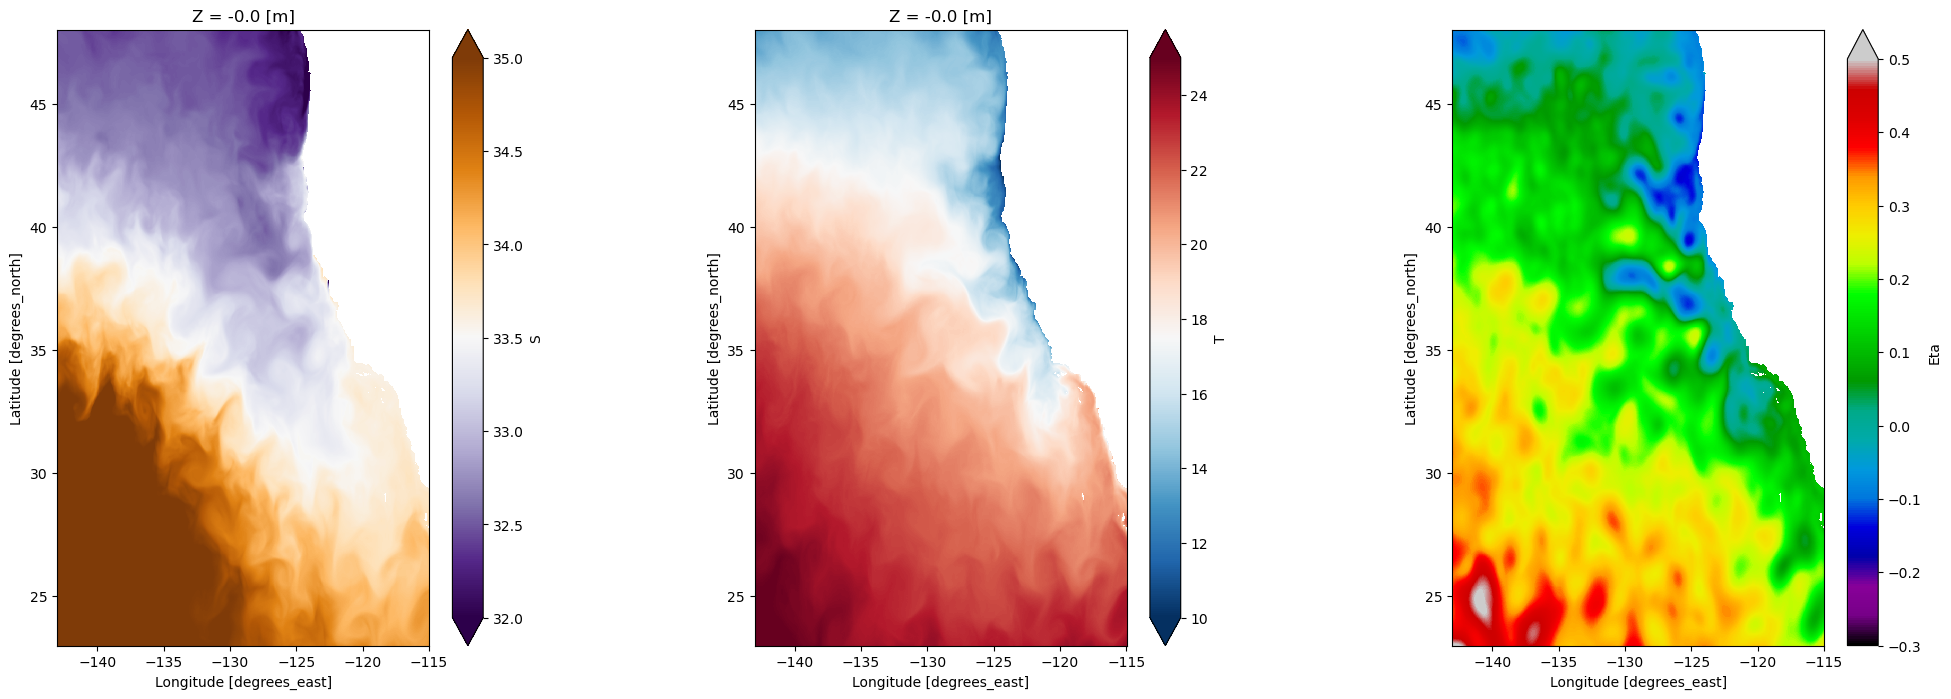

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 8))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0])
dsSal.plot(cmap='PuOr_r', vmin=32,vmax=35)
ax2 = plt.subplot(gs[1])
dsTemp.plot(cmap='RdBu_r', vmin=10,vmax=25)
ax3 = plt.subplot(gs[2])
dsEta.plot(cmap='nipy_spectral', vmin=-0.3, vmax=0.5)
plt.show()

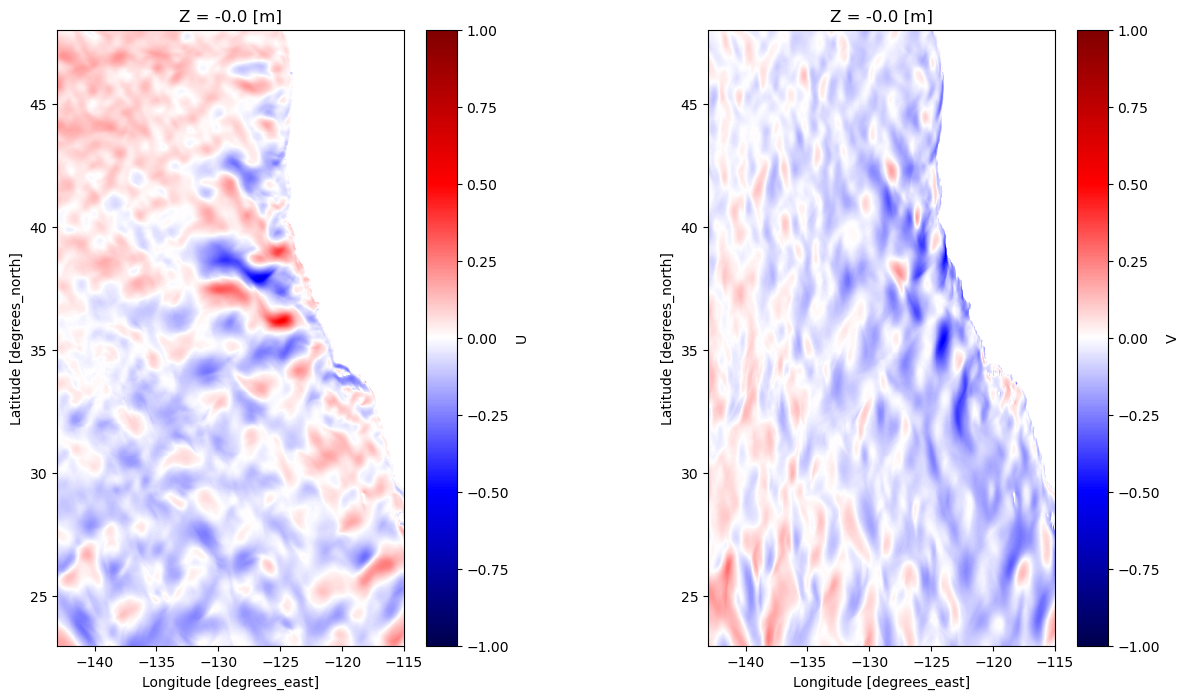

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0])
dsU.plot(cmap='seismic', vmin=-1,vmax=1)
ax2 = plt.subplot(gs[1])
dsV.plot(cmap='seismic', vmin=-1,vmax=1)
plt.show()